In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
import cmath as c
import sys
import time


if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
    
iterations = 100
tolerance = 1e-10
delta = 1e-8
alpha = 1
gamma = 0


### derivative

Calculates the derivative of a given function using the limiting process:

$$ \frac{f(x + h) - f(x)}{h} $$

which approaches $ f'(x) $ as h -> 0

In [9]:
def derivative(f, x):
    g = lambda x: (f(x + complex(delta, delta)) - f(x))/ complex(delta, delta)
    return g(x)

### newton

Given an value $ z_i $, we apply the following iterative process:

$$ z_{i+1} = z_i - \frac{f(z_i)}{f'(z_i)} $$

where i ranges from 0 to n, with n being the number of iterations. This process is a generalised version of Newton's method, where a, b are complex numbers. There are two possible outcomes for this process. The first is that we converge to a point z = x + iy in the complex plane, where x, y ...

The other outcome is that we do not convege to a point, no matter the number of iterations. Either z diverges to +- infinity, or oscillates within a specific region. We specify a limit to the number of iterations in this case.

We return the number of iterations i, which gives a way of assigning colours to different points. This will be the case for all other numerical methods used too.






In [19]:
def newton(x, f):
    count = 0
    
    for i in range(iterations):
        try:
            dx = derivative(f, x)
            if abs(dx) < tolerance:
                break
            x0 = x - (f(x) / dx) + gamma
            if abs(f(x0)) < tolerance:
                break
            x = x0
            
        except OverflowError:
            break        
    return i

### steffensen

Steffensen's method is similar to Newton's method, but without derivatives. This version uses Aitken's delta squared process to accelerate the rate of convergence. given a complex number $ z_i $, we use the following equation:

$$ z_{i+3} = z_i - \frac{(\Delta z_i)^2}{\Delta ^2 z_i} $$

where $ \Delta z_i = z_{i+1} - z_i, \Delta ^2 z_i = z_i -2z_{i+1} + z_{i+2}, z_{i+1} = f(z_i)$ and $
z_{i+2} = f(z_{i+1})$






In [11]:
def steffensen(x0, f):
    for i in range(iterations):
        try:
            x1 = f(x0)
            x2 = f(x1)
            delta = x1 - x0
            delta_sqr = x0 - (2 * x1) + x2
            if abs(delta_sqr) < tolerance:
                break
            aitkenX = x0 - ((delta ** 2) / delta_sqr)
            if abs(aitkenX - x2) < tolerance:
                break
            x0 = aitkenX
        except OverflowError:
            break
    return i

### ostrowski

Ostrowki's method acts as an extension of Newton's method, consisting of the following equations:

$$ z_{i}^ * = z_i - \frac{f(z_i)}{f'(z_i)} $$

$$ z_{i+1} = z_i^* - \frac{f(z_i^*)(z_i - z_i^*)}{f(z_i) -2f(z_i^*)} $$


Consequency, it has a fourth-order convergence, compared to the quadratic convergence of the previous two methods




In [12]:
def ostrowski(x, f):
    for i in range(iterations):
        try:
            dx = derivative(f, x)
            if abs(dx) < tolerance:
                break
            y0 = x - (f(x) / dx)
            difference = f(x) -2*f(y0)
            if abs(difference) < tolerance:
                break
            x0 = y0 - f(y0)*(x - y0)/difference
            if abs(x0 - x) < tolerance:
                break
            x = x0
        except OverflowError:
            break      
    return i

### generate_grid

Creates the Argand plane, with the real axis spanning from xa to xb, and the imaginary axis spanning from ya to yb.
We can then apply transformations, like the Mobius transform, to alter the plane of points if we so choose, returning a matrix of points

### render

Applies our chosen iterative process on all points on the plane, assigning colours based on number of iterations. A piece of abstract art is then generated using matplotlib 


In [13]:
def generate_grid(xa, xb, ya, yb, pixels):
    x = np.linspace(xa, xb, pixels)
    y = np.linspace(ya, yb, pixels)
    xx, yy = np.meshgrid(x,y)
    return mobius(1,0,0,0, xx + yy*1j)

def render(data, function, address):
    im = np.frompyfunc(newton,2, 1)(data, function).astype(float)
    fig = plt.figure(figsize=(1000 /200.0, 1000 / 200.0), dpi=500)
    ax = fig.add_axes([0, 0, 1, 1], aspect=1)
    ax.axis("off")
    ax.imshow(im, cmap="gist_heat")
    fig.savefig(address)

In [14]:
def mobius(a,b,c,d,x):
    return x if abs(a*d - b*c) == 0 else (a*x + b)/(c*x + d)

In [15]:
data = generate_grid(2.5, -2.5, 2.5, -2.5, 1000)
print(data)
test_function = lambda x: x**5 - 1

[[ 2.5       +2.5j         2.49499499+2.5j         2.48998999+2.5j
  ... -2.48998999+2.5j        -2.49499499+2.5j
  -2.5       +2.5j       ]
 [ 2.5       +2.49499499j  2.49499499+2.49499499j  2.48998999+2.49499499j
  ... -2.48998999+2.49499499j -2.49499499+2.49499499j
  -2.5       +2.49499499j]
 [ 2.5       +2.48998999j  2.49499499+2.48998999j  2.48998999+2.48998999j
  ... -2.48998999+2.48998999j -2.49499499+2.48998999j
  -2.5       +2.48998999j]
 ...
 [ 2.5       -2.48998999j  2.49499499-2.48998999j  2.48998999-2.48998999j
  ... -2.48998999-2.48998999j -2.49499499-2.48998999j
  -2.5       -2.48998999j]
 [ 2.5       -2.49499499j  2.49499499-2.49499499j  2.48998999-2.49499499j
  ... -2.48998999-2.49499499j -2.49499499-2.49499499j
  -2.5       -2.49499499j]
 [ 2.5       -2.5j         2.49499499-2.5j         2.48998999-2.5j
  ... -2.48998999-2.5j        -2.49499499-2.5j
  -2.5       -2.5j       ]]


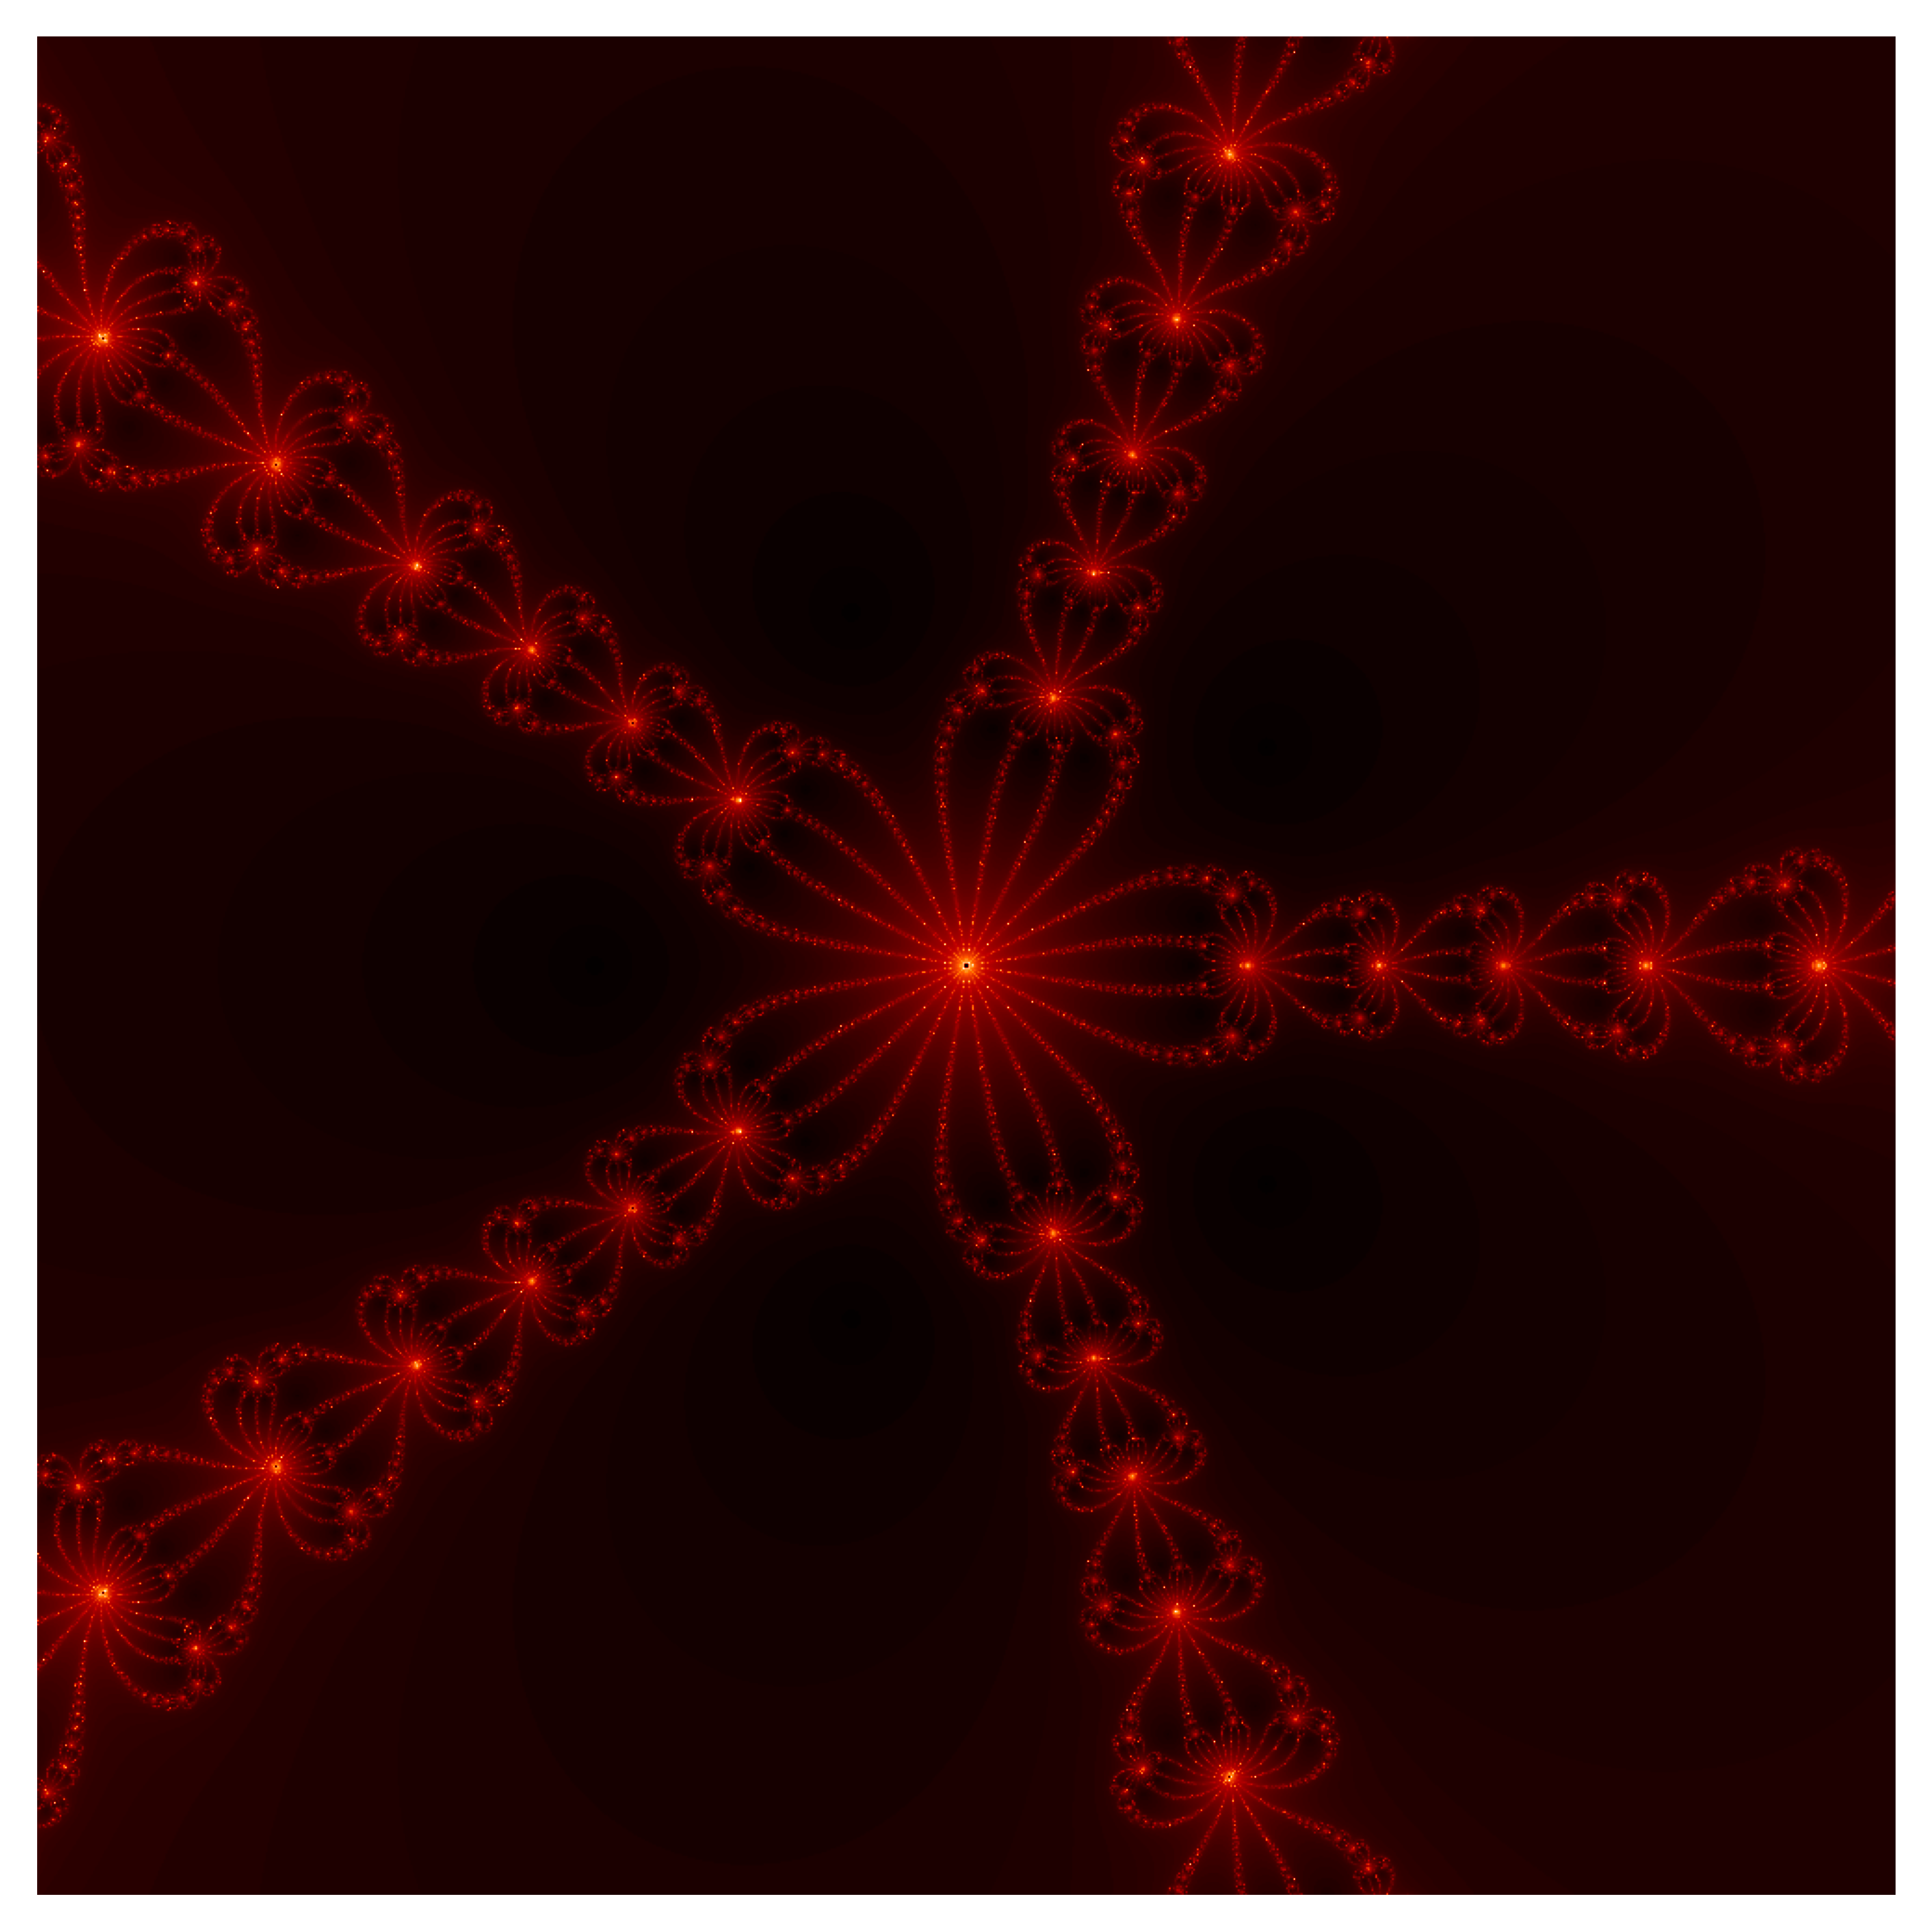

In [20]:
render(data, test_function, "art.png")